Kombinierte Pandas Datenbank:
           Datum  KielerWoche  Warengruppe     Umsatz
0     2012-06-16          1.0          NaN        NaN
1     2012-06-17          1.0          NaN        NaN
2     2012-06-18          1.0          NaN        NaN
3     2012-06-19          1.0          NaN        NaN
4     2012-06-20          1.0          NaN        NaN
...          ...          ...          ...        ...
9401  2017-12-21          NaN          6.0  87.471228
9402  2017-12-22          NaN          6.0  71.911652
9403  2017-12-23          NaN          6.0  84.062223
9404  2017-12-24          NaN          6.0  60.981969
9405  2017-12-27          NaN          6.0  34.972644

[9406 rows x 4 columns]
Umsatz pro Tag:            Datum       Umsatz
0     2013-07-01  1269.249107
1     2013-07-02  1430.008397
2     2013-07-03  1124.274894
3     2013-07-04  1184.309567
4     2013-07-05  1288.023060
...          ...          ...
1814  2018-07-27  1572.847053
1815  2018-07-28  1646.938417
1816  2018-

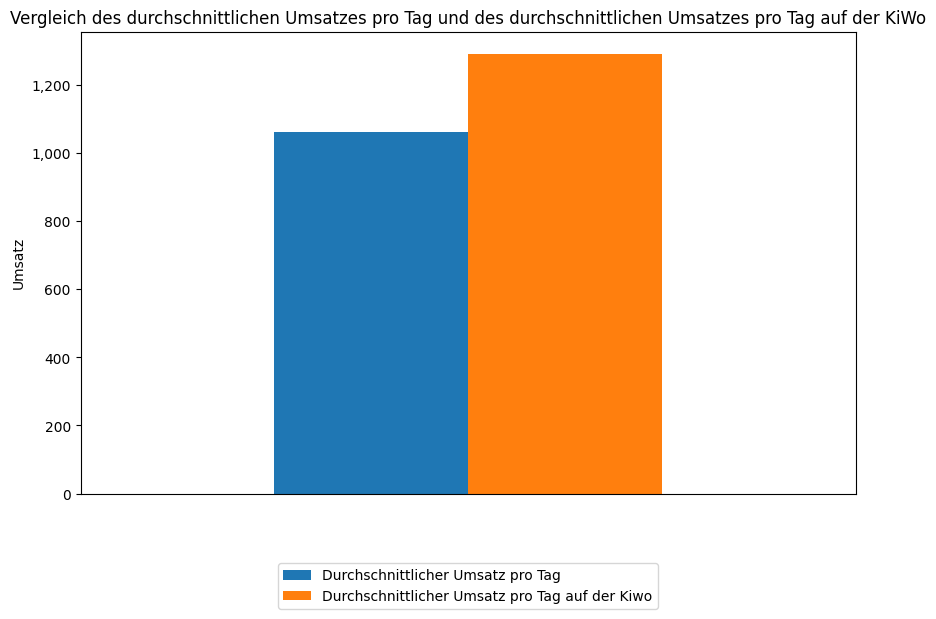

In [1]:
# Hausaufgabe für den 16.05.2024: 
# Deskriptive Statistiken und Visualisierungen 
# Auswirkungen der KiWo auf den Umsatz

# Pandas Datenbank
import pandas as pd

# Dataframe für die Aufgabe erstellen 
# Es werden nur die Spalten 'Umsatz', 'Datum' und 'kiwo' und nur die beiden Dateien kiwo.csv und umsatzdaten_gekuerzt.csv benötigt
files = ['kiwo.csv', 'umsatzdaten_gekuerzt.csv']

# Jede Datei wird in einen DataFrame geladen
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

# Beide DataFrames zu einem einzigen DataFrame zusammenfügen
combined_df = pd.concat(dfs, ignore_index=True)

# Ausdruck des kombinierten DataFrames
print('Kombinierte Pandas Datenbank:')
print(combined_df)

# Ermittlung Warenumsatz für jeden Tag (egal ob KiWo oder nicht)
# CSV-Datei in einen DataFrame laden
df_umsatz = pd.read_csv('umsatzdaten_gekuerzt.csv')

# Neuer DataFrame mit aufsummiertem Warenumsatz pro Tag
df_umsatz_pro_tag = df_umsatz.groupby('Datum')['Umsatz'].sum().reset_index()
print('Umsatz pro Tag:', df_umsatz_pro_tag)

# Durchschnittlicher Warenumsatz pro Tag
durchschnittlicher_umsatz_pro_tag = df_umsatz_pro_tag['Umsatz'].mean()
print('Durchschnittlicher Warenumsatz pro Tag:', durchschnittlicher_umsatz_pro_tag)

# Ermittlung Warenumsatz für jeden Tag der KiWo
# CSV-Datei in einen DataFrame laden
df_kiwo = pd.read_csv('kiwo.csv')

# Neuer DataFrame, der df_umsatz_pro_tag und df_kiwo auf der Grundlage des Datums zusammenführt
df_merged = pd.merge(df_umsatz_pro_tag, df_kiwo, on='Datum', how='inner')

# Durchschnittlicher Warenumsatz pro Tag auf der KiWo
durchschnittlicher_umsatz_pro_tag_auf_der_kiwo = df_merged['Umsatz'].mean()

print('Durchschnittlicher Warenumsatz pro Tag auf der KiWo:', durchschnittlicher_umsatz_pro_tag_auf_der_kiwo)

# DataFrame mit Durchschnittswerten erstellen
df_durchschnitt = pd.DataFrame({
    'Durchschnittlicher Umsatz pro Tag': [durchschnittlicher_umsatz_pro_tag],
    'Durchschnittlicher Umsatz pro Tag auf der Kiwo': [durchschnittlicher_umsatz_pro_tag_auf_der_kiwo]
})

# Und nun die VISUALISIERUNG
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Balkendiagramm erstellen
df_durchschnitt.plot(kind='bar', figsize=(10,6))

# Hinzufügen von Legenden
plt.ylabel('Umsatz')
plt.title('Vergleich des durchschnittlichen Umsatzes pro Tag und des durchschnittlichen Umsatzes pro Tag auf der KiWo')
plt.xticks([])  # Entfernen der x-Ticks, da es nur einen Balken gibt
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', borderaxespad=0.)

# Formatierung der Y-Achse mit Tausenderpunkten
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)

# Diagramm anzeigen
plt.show()
df_merged1 = pd.merge(df_umsatz, df_wetter, on='Datum', how='inner')


import numpy as np

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(df_merged1['Temperatur'], df_merged1['Umsatz'] , cmap='coolwarm', alpha=0.7)

# Trendlinie hinzufügen
z = np.polyfit(df_merged1['Temperatur'], df_merged1['Umsatz'], 1) # Polynom vom Grad 1 (lineare Regression)
p = np.poly1d(z)
plt.plot(df_merged1['Temperatur'], p(df_merged1['Temperatur']), "r--")

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Temperatur (°C)')
plt.ylabel('Umsatz')
plt.title('Umsatz je Warengruppe in Bezug zur Temperatur')

# Farblegende hinzufügen
plt.colorbar(label='Wetter')

# Diagramm anzeigen
plt.show()



